## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
total_mouse = len(combined_df["Mouse ID"].unique())
total_mouse

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mouse)==False]
data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [146]:
# Checking the number of mice in the clean DataFrame.
total_mouse_clean = len(data_clean_df["Mouse ID"].unique())
total_mouse_clean

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_data_clean_df = data_clean_df.groupby ("Drug Regimen")
stat_data_clean_df.count().head()



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regime_mean = stat_data_clean_df["Tumor Volume (mm3)"].mean()
drug_regime_mean

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regime_median= stat_data_clean_df["Tumor Volume (mm3)"].median()
drug_regime_median

drug_regime_variance = stat_data_clean_df["Tumor Volume (mm3)"].var()
drug_regime_variance

drug_regime_stdr_dev = stat_data_clean_df["Tumor Volume (mm3)"].std()
drug_regime_stdr_dev

regimen_sem = data_clean_df["Tumor Volume (mm3)"].sem()
regimen_sem

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean":[drug_regime_mean],
                           "Median":[drug_regime_median], 
                           "Variance": [drug_regime_variance], 
                           "Standard Deviation": [drug_regime_stdr_dev],
                           "SEM": [regimen_sem]})
summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,0.205591


In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_II = data_clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_II.head(12)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

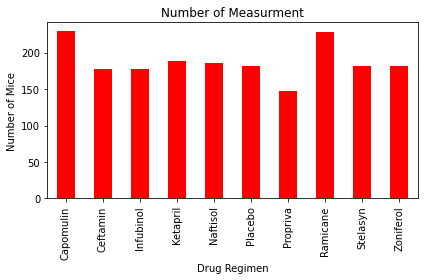

In [230]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurments = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = total_measurments.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Measurment")

plt.savefig("../Images/Number of Measurments.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

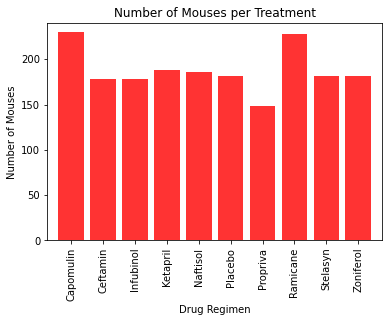

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_mouse = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

count_mouse

mouse_list =data_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
mouse_list

x_axis = np.arange(len(count_mouse))
fig1, ax1 = plt.subplots()
plt.bar(x_axis, mouse_list, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mouse_list)+10)

plt.title("Number of Mouses per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouses")

plt.savefig("../Images/Number of Mouses per Treatment.png", bbox_inches = "tight")

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = data_clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


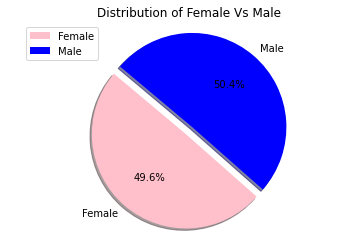

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["pink", "blue"]
explode = (0.1, 0)
mouse_gender.plot.pie(y='Total Count', colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title("Distribution of Female Vs Male")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male.png", bbox_inches = "tight")
plt.show()

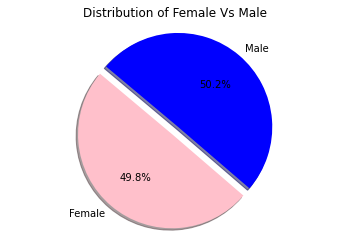

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Distribution of Female Vs Male")

plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male Pyplot", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_max_timepoint = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max_timepoint = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max_timepoint = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max_timepoint = ceftamin_df.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_volume = pd.DataFrame(capomulin_max_timepoint)
capomulin_combined = pd.merge(capomulin_volume, data_clean_df, on=("Mouse ID","Timepoint"))
capomulin_combined.head()

ramicane_volume = pd.DataFrame(ramicane_max_timepoint)
ramicane_combined = pd.merge(ramicane_volume, data_clean_df, on=("Mouse ID","Timepoint"))
ramicane_combined.head()

infubinol_volume = pd.DataFrame(infubinol_max_timepoint)
infubinol_combined = pd.merge(infubinol_volume, data_clean_df, on=("Mouse ID","Timepoint"))
infubinol_combined.head()

ceftamin_volume = pd.DataFrame(ceftamin_max_timepoint)
ceftamin_combined = pd.merge(ceftamin_volume, data_clean_df, on=("Mouse ID","Timepoint"))
ceftamin_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [198]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
line_plot.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


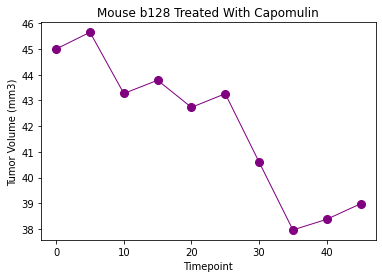

In [201]:
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Mouse b128 Treated With Capomulin")
plt.plot(x_axis, y_axis, linewidth=1, markersize=8,marker="o",color="purple")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


plt.savefig("../Images/Mouse b128 Treated With Capomulin", bbox_inches = "tight")
plt.show()

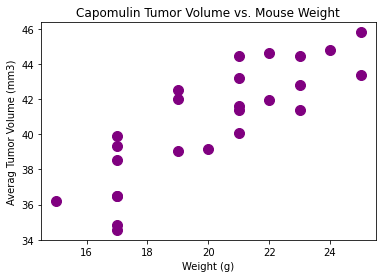

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average_volume =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capomulin_average_volume['Weight (g)'],capumulin_average_volume['Tumor Volume (mm3)'],s=100, color="purple")
plt.title("Capomulin Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")


plt.savefig("../Images/Capomulin Tumor Volume vs. Mouse Weight.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
